# Preprocessing Teks

In [1]:
# Mengatur seed untuk reproduktibilitas
import numpy as np
import random
random.seed(42) # Mengatur seed untuk modul random
np.random.seed(42) # Mengatur seed untuk modul numpy random

# Dengan mengatur seed seperti ini, kita memastikan bahwa hasil random dari modul
# random dan numpy akan sama setiap kali kode ini dijalankan, asalkan kondisi 
# lingkungan eksekusi tetap sama.

## 1. Memuat Data dan Mengambil Subset

In [2]:
import pandas as pd
df = pd.read_csv("detik-fiks.csv")
df_subset = df.head(15020)
#df_subset = df.head(1000) #sukses
df_subset.to_csv("dataset.csv", index=False)

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Case folding

In [3]:
import pandas as pd

# Membaca dataset dari file CSV
df = pd.read_csv('dataset.csv')

# Mengubah kolom 'description' menjadi huruf kecil (lowercase)
df['description_lower_case'] = df['description'].str.lower() 

df.to_csv('dataset.csv', index=False)

## 3. Cleaning (menghapus tanda baca)

In [4]:
import pandas as pd
import string
df = pd.read_csv('dataset.csv')

# Fungsi untuk menghapus tanda baca dari teks
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Mengaplikasikan fungsi remove_punctuation ke kolom 'description_lower_case'
df['description_clean'] = df['description_lower_case'].apply(remove_punctuation)
df.to_csv('dataset.csv', index=False)

## 4. Tokenizing & Removal stopwords

In [5]:
import pandas as pd
import spacy
from spacy.lang.id.stop_words import STOP_WORDS # Mengimpor spacy dan daftar stopword bahasa Indonesia.

df = pd.read_csv("dataset.csv")

# Menginisialisasi model bahasa Indonesia dari Spacy
nlp = spacy.blank("id") 

# memecah teks menjadi token-token.
def tokenizing(text):
    doc = nlp(text)
    filtered_text = [token.text for token in doc]
    return filtered_text

# menghapus stopwords
def remove_stopwords(text):
    filtered_text = []
    for token in text:
      if token not in STOP_WORDS:
        filtered_text.append(token)
    return filtered_text

# menggabungkan token-token menjadi kalimat kembali
def to_sentence(text):
    return " ".join(text)

# Melakukan tokenisasi pada kolom 'description_clean'
df['description_token'] = df['description_clean'].apply(tokenizing)

# Menghapus stopwords dari token-token
df['description_stopword'] = df['description_token'].apply(remove_stopwords)


# Menggabungkan token-token yang sudah diproses kembali menjadi kalimat
df['postprocessing'] = df['description_stopword'].apply(to_sentence)

df.to_csv("dataset.csv", index=False)

# Library Spacy digunakan untuk tokenisasi teks dalam bahasa Indonesia.
# Fungsi tokenizing digunakan untuk memecah teks menjadi token-token.
# Fungsi remove_stopwords digunakan untuk menghapus stopwords dari token-token.
# Fungsi to_sentence digunakan untuk menggabungkan token-token kembali menjadi kalimat.

# Topic Modelling dengan BERTopic

In [6]:
import numpy as np
import pandas as pd
train = pd.read_csv('dataset.csv')
train[['description', 'description_lower_case', 'description_clean', 'description_token', 'description_stopword', 'postprocessing']]

,description,description_lower_case,description_clean,description_token,description_stopword,postprocessing
0,Soal Cak Imin jadi Cawapres Anies sempat dibah...,soal cak imin jadi cawapres anies sempat dibah...,soal cak imin jadi cawapres anies sempat dibah...,"['soal', 'cak', 'imin', 'jadi', 'cawapres', 'a...","['cak', 'imin', 'cawapres', 'anies', 'dibahas'...",cak imin cawapres anies dibahas rapat tim 8 de...
1,Mantan Anggota Tim 8 KPP Iftitah Sulaiman meng...,mantan anggota tim 8 kpp iftitah sulaiman meng...,mantan anggota tim 8 kpp iftitah sulaiman meng...,"['mantan', 'anggota', 'tim', '8', 'kpp', 'ifti...","['mantan', 'anggota', 'tim', '8', 'kpp', 'ifti...",mantan anggota tim 8 kpp iftitah sulaiman part...
2,PPP merespons SBY yang menyebut ada menteri ak...,ppp merespons sby yang menyebut ada menteri ak...,ppp merespons sby yang menyebut ada menteri ak...,"['ppp', 'merespons', 'sby', 'yang', 'menyebut'...","['ppp', 'merespons', 'sby', 'menyebut', 'mente...",ppp merespons sby menyebut menteri aktif menga...
3,Zulhas menyebut Cak Imin seakan-akan belok tan...,zulhas menyebut cak imin seakan-akan belok tan...,zulhas menyebut cak imin seakanakan belok tanp...,"['zulhas', 'menyebut', 'cak', 'imin', 'seakana...","['zulhas', 'menyebut', 'cak', 'imin', 'seakana...",zulhas menyebut cak imin seakanakan belok lamp...
4,Gerindra bicara peluang Demokrat merapat ke Ko...,gerindra bicara peluang demokrat merapat ke ko...,gerindra bicara peluang demokrat merapat ke ko...,"['gerindra', 'bicara', 'peluang', 'demokrat', ...","['gerindra', 'bicara', 'peluang', 'demokrat', ...",gerindra bicara peluang demokrat merapat koali...
...,...,...,...,...,...,...
15014,Cak Imin menyoroti proses pencoblosan yang ter...,cak imin menyoroti proses pencoblosan yang ter...,cak imin menyoroti proses pencoblosan yang ter...,"['cak', 'imin', 'menyoroti', 'proses', 'pencob...","['cak', 'imin', 'menyoroti', 'proses', 'pencob...",cak imin menyoroti proses pencoblosan negeri c...
15015,Pelanggaran dilakukan dengan cara memberikan f...,pelanggaran dilakukan dengan cara memberikan f...,pelanggaran dilakukan dengan cara memberikan f...,"['pelanggaran', 'dilakukan', 'dengan', 'cara',...","['pelanggaran', 'formulir', 'c6', 'pemberitahu...",pelanggaran formulir c6 pemberitahuan pemungut...
15016,Samawi menggelar doa bersama untuk kelancaran ...,samawi menggelar doa bersama untuk kelancaran ...,samawi menggelar doa bersama untuk kelancaran ...,"['samawi', 'menggelar', 'doa', 'bersama', 'unt...","['samawi', 'menggelar', 'doa', 'kelancaran', '...",samawi menggelar doa kelancaran pemilu 2024 sa...
15017,KPU RI menerbitkan keputusan mengenai pencoblo...,kpu ri menerbitkan keputusan mengenai pencoblo...,kpu ri menerbitkan keputusan mengenai pencoblo...,"['kpu', 'ri', 'menerbitkan', 'keputusan', 'men...","['kpu', 'ri', 'menerbitkan', 'keputusan', 'pen...",kpu ri menerbitkan keputusan pencoblosan pania...


In [7]:
docs = train['postprocessing'].to_list()
docs[:10]

['cak imin cawapres anies dibahas rapat tim 8 desember 2022 eks tim 8 menyebut manuver cak imin mengejutkan',
 'mantan anggota tim 8 kpp iftitah sulaiman partai demokrat memiliki trauma pilpres ahy batal diusung cawapres prabowo',
 'ppp merespons sby menyebut menteri aktif mengajak koalisi pd pks ppp menebak',
 'zulhas menyebut cak imin seakanakan belok lampu sein',
 'gerindra bicara peluang demokrat merapat koalisi indonesia maju mendukung prabowo 2024',
 'menurutnya kehadiran anies acara wujud kolaborasi simpul relawan',
 'eks anggota tim 8 mengungkap pkb partai golkar diprediksi masuk koalisi perubahan batal bergabung',
 'demokrat mengambil sikap menyikapi duet anies baswedanketum pkb muhaimin iskandar cak imin demokrat mencabut dukungan anies baswedan capres 2024',
 'sekjen pkb akronim duet aniescak imin amin diharap akronim mengantar aniescak imin menang pilpre',
 'pkb deklarasi aniescak imin besok siang surabaya deklarasi digelar hotel majapahit surabaya besok siang']

## 1. Mengonversi Teks ke Embedding dan Reduksi Dimensi

In [8]:
# Menggunakan SentenceTransformer untuk mengubah teks menjadi representasi numerik (embedding) 
# Menggunakan UMAP untuk reduksi dimensi embedding menjadi 5 dimensi.
from sentence_transformers import SentenceTransformer
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
embendding = SentenceTransformer("distiluse-base-multilingual-cased-v1")

In [9]:
# Mendapatkan embedding dari teks (docs) menggunakan SentenceTransformer
docs_ = embendding.encode(docs)

# Melakukan reduksi dimensi menggunakan UMAP
docs_2 = umap_model.fit_transform(docs_)

C:\Users\hp\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [10]:
# Membuat DataFrame baru 'data' dengan kolom 'postprocessing', 'embedding', dan 'dimentionality_reduction'
data = pd.DataFrame({'postprocessing': train['postprocessing'], 'embedding' : None, 'dimentionality_reduction' : None})

# Mengisi kolom 'embedding' dengan nilai dari docs_.tolist()
data['embedding'] = docs_.tolist()

# Mengisi kolom 'dimentionality_reduction' dengan nilai dari docs_2.tolist()
data['dimentionality_reduction'] = docs_2.tolist()

data.to_csv('embed.csv', index=False)
data

,postprocessing,embedding,dimentionality_reduction
0,cak imin cawapres anies dibahas rapat tim 8 de...,"[0.013377238065004349, 0.030561042949557304, -...","[-0.6781753301620483, 9.375307083129883, 8.611..."
1,mantan anggota tim 8 kpp iftitah sulaiman part...,"[0.020354479551315308, 0.08360452204942703, 0....","[7.021073818206787, 9.596179962158203, 1.87947..."
2,ppp merespons sby menyebut menteri aktif menga...,"[0.049666907638311386, 0.04466314986348152, -0...","[10.53563404083252, 7.517042636871338, 11.3050..."
3,zulhas menyebut cak imin seakanakan belok lamp...,"[0.006111136171966791, 0.033285193145275116, -...","[10.96391487121582, 7.513903617858887, 12.1051..."
4,gerindra bicara peluang demokrat merapat koali...,"[-0.0442330427467823, 0.007288343273103237, -0...","[5.734028339385986, 9.751100540161133, 2.42653..."
...,...,...,...
15014,cak imin menyoroti proses pencoblosan negeri c...,"[0.024285711348056793, 0.04603804275393486, 0....","[10.330458641052246, 6.533160209655762, 10.300..."
15015,pelanggaran formulir c6 pemberitahuan pemungut...,"[0.017543906345963478, 0.0800885558128357, -0....","[7.733449935913086, 8.395657539367676, 9.23436..."
15016,samawi menggelar doa kelancaran pemilu 2024 sa...,"[-0.008904676884412766, 0.05206555873155594, 0...","[-0.7873538732528687, 9.906145095825195, 8.719..."
15017,kpu ri menerbitkan keputusan pencoblosan pania...,"[0.013052362017333508, 0.05834006518125534, 0....","[0.963670551776886, 9.56257152557373, 8.996508..."


## 2. Clustering Menggunakan KMeans

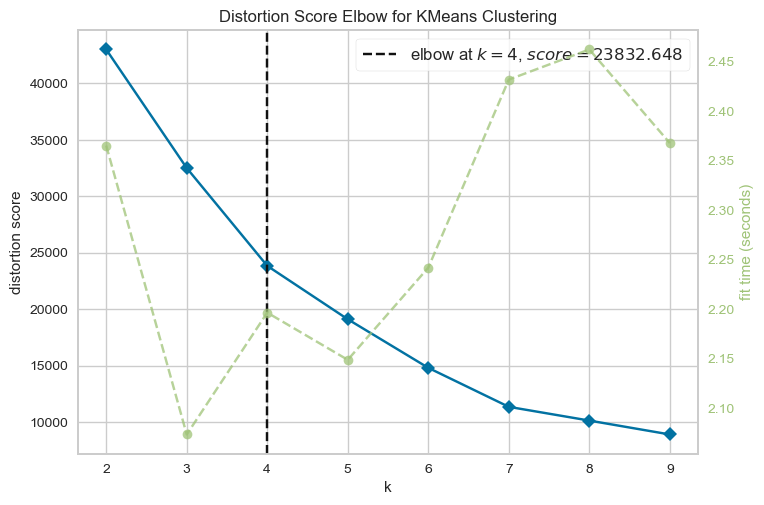

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

# Pra-pemrosesan (Scaling) data
scaler = StandardScaler()
scaled_docs_2 = scaler.fit_transform(docs_2)

# Model KMeans
model = KMeans(init='k-means++', random_state=0, n_init=10, max_iter=300)

# Elbow visualizer
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')
visualizer.fit(scaled_docs_2)
visualizer.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


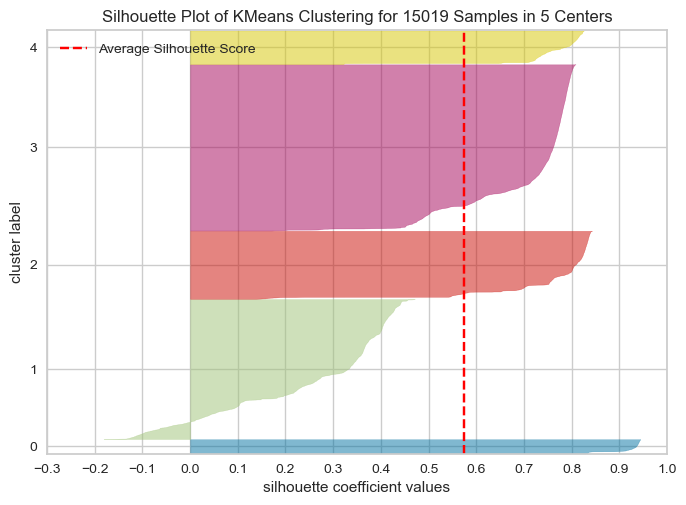

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 15019 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
kmeans = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(docs_2)
visualizer.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


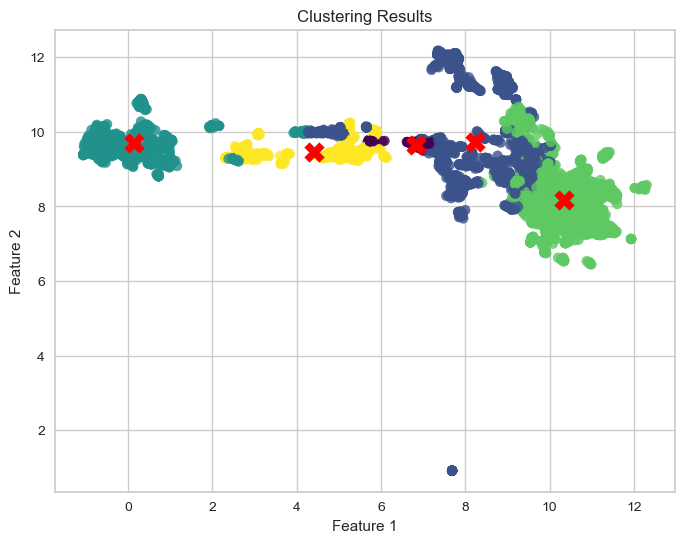

In [13]:
import matplotlib.pyplot as plt
# KMeans clustering with optimal number of clusters
kmeans.fit(docs_2)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(docs_2[:, 0], docs_2[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 3. Evaluasi Hasil Clustering

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial import distance
# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(docs_2, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Evaluate clustering using Sum of Squared Errors (SSE)
sse = np.sum((docs_2 - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
print(f'SSE: {sse}')

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(docs_2, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')

# Evaluate clustering using Calinski-Harabasz Index (Chi)
calinski_harabasz_index = calinski_harabasz_score(docs_2, kmeans.labels_)
print(f'Calinski-Harabasz Index: {calinski_harabasz_index}')

# Dunn Index
def dunn_index(X, labels):
    min_inter_cluster_distance = np.inf
    max_intra_cluster_diameter = -np.inf
    for i in np.unique(labels):
        cluster_points = X[labels == i]
        max_intra_cluster_diameter = max(max_intra_cluster_diameter, np.max(distance.pdist(cluster_points)))
        for j in np.unique(labels):
            if i != j:
                other_cluster_points = X[labels == j]
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(distance.cdist(cluster_points, other_cluster_points)))
    dunn = min_inter_cluster_distance / max_intra_cluster_diameter
    return dunn

dunn = dunn_index(docs_2, kmeans.labels_)
print(f'Dunn Index: {dunn}')

Silhouette Score: 0.5749925374984741
SSE: 74563.5625
Davies-Bouldin Index: 0.6460112841782341
Calinski-Harabasz Index: 18024.57898777237
Dunn Index: 0.0025118308134573757


## 4. Pembuatan dan Evaluasi Model BERTopic

In [15]:
# default bertopic
# mengonversi teks menjadi representasi berbasis kata (bag-of-words).
# Tujuan: Menghitung frekuensi kemunculan setiap kata dalam teks.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs) # Mengubah dokumen teks menjadi vektor fitur berdasarkan frekuensi kata
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

,00,001,007,008,01,02,023,03,033,039,...,zuhri,zukifli,zul,zulfan,zulhas,zulhasan,zulhasgibran,zulkarnain,zulkieflimansyah,zulkifli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# topic_model = BERTopic()

In [17]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model=None, umap_model=None, hdbscan_model=kmeans) # tokenizer dan weighting schemenya default
topics, _ = topic_model.fit_transform(docs, docs_)

In [18]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,6211,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...
1,1,2661,1_nomor_urut_gibran_indonesia,"[nomor, urut, gibran, indonesia, rakabuming, r...",[keriuhan cawapres nomor urut 2 gibran rakabum...
2,2,2615,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...
3,3,2349,3_2024_pemilu_pilpres_kpu,"[2024, pemilu, pilpres, kpu, prabowo, suara, d...",[pemilu 2024 dilaksanakan februari 2024 simak ...
4,4,1183,4_debat_pilpres_cawapres_2024,"[debat, pilpres, cawapres, 2024, capres, kpu, ...",[debat pilpres 2024 debat perdana cawapres 202...


In [19]:
topic_info = topic_model.get_topic_info()
df = pd.DataFrame(topic_info)
df.to_csv("topic_info_all.csv",index=False)

In [20]:
topic_model.get_topic_info()[:10]

,Topic,Count,Name,Representation,Representative_Docs
0,0,6211,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...
1,1,2661,1_nomor_urut_gibran_indonesia,"[nomor, urut, gibran, indonesia, rakabuming, r...",[keriuhan cawapres nomor urut 2 gibran rakabum...
2,2,2615,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...
3,3,2349,3_2024_pemilu_pilpres_kpu,"[2024, pemilu, pilpres, kpu, prabowo, suara, d...",[pemilu 2024 dilaksanakan februari 2024 simak ...
4,4,1183,4_debat_pilpres_cawapres_2024,"[debat, pilpres, cawapres, 2024, capres, kpu, ...",[debat pilpres 2024 debat perdana cawapres 202...


In [21]:
topic_info = topic_model.get_topic_info()[:10]
df = pd.DataFrame(topic_info)
df.to_csv("topic_info_top_10.csv",index=False)

In [22]:
# 
topic_model.get_topic(0)

[('ganjar', 0.04228340814255099),
 ('prabowo', 0.03969499723372899),
 ('anies', 0.03744662970211994),
 ('imin', 0.0360399452404296),
 ('ketua', 0.03424296854126347),
 ('cak', 0.032131486451693225),
 ('gibran', 0.030416701871039717),
 ('pdip', 0.030285024531602606),
 ('prabowogibran', 0.024441992673128656),
 ('mahfud', 0.024421661024268633)]

In [36]:
topic_model.visualize_topics() 
# seberapa dekat atau jauh topik -topik yang berbeda pada hasil pemodelan topik. 

In [24]:
topic_model.visualize_hierarchy()
# hubungan antar topik yang dihasilkan

In [25]:
topic_model.visualize_barchart()
# frekuensi tiap kata pada representasi topik untuk setiap cluster atau topik

In [37]:
topic_model.visualize_heatmap()
# tingkat kemiripan antar topik

In [27]:
topic_model.visualize_term_rank()

## 5. Koherensi Topik

In [28]:
from os import path
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

topics_info = topic_model.get_topics()

#fungsi menghhitung topic coherence
def calculate_coherence(topics_info, docs):
    coherence_values = []
    for topic_id in topics_info:
        topic_words = topics_info[topic_id]
        topic_string = ' '.join([str(word) for word in topic_words])
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(docs)
        topic_vectors = vectorizer.transform([topic_string])
        similarity_matrix = cosine_similarity(X, topic_vectors)
        coherence = similarity_matrix.mean()
        coherence_values.append(coherence)
    return coherence_values
coherence_values = calculate_coherence(topics_info, docs)

name_topic_info = pd.read_csv('topic_info_all.csv')
data = {"ID Topic": [f"{i}" for i in range(len(coherence_values))],
        "Koherensi": coherence_values
        }
df = pd.DataFrame(data)
df.to_csv('nilai_topic_koherensi.csv', index=False)

topic_info_all =  pd.read_csv("topic_info_all.csv")
nilai_topic_koherensi = pd.read_csv("nilai_topic_koherensi.csv")

merged_df = pd.merge(topic_info_all, nilai_topic_koherensi, left_on ='Topic', right_on='ID Topic',how='left')

merged_df.drop(columns=['ID Topic'], inplace=True)
merged_df.to_csv('topic_info_all_koherensi.csv', index=False)

if os.path.exists("nilai_topic_koherensi.csv") :
  os.remove("nilai_topic_koherensi.csv")

topic_info_all_koherensi =  pd.read_csv("topic_info_all_koherensi.csv")
topic_info_all_koherensi[:10]



,Topic,Count,Name,Representation,Representative_Docs,Koherensi
0,0,6211,0_ganjar_prabowo_anies_imin,"['ganjar', 'prabowo', 'anies', 'imin', 'ketua'...",['ketum nasdem surya paloh anies baswedan ketu...,0.101181
1,1,2661,1_nomor_urut_gibran_indonesia,"['nomor', 'urut', 'gibran', 'indonesia', 'raka...",['keriuhan cawapres nomor urut 2 gibran rakabu...,0.087202
2,2,2615,2_presiden_politik_jokowi_survei,"['presiden', 'politik', 'jokowi', 'survei', 'd...",['lembaga survei indikator politik indonesia m...,0.075850
3,3,2349,3_2024_pemilu_pilpres_kpu,"['2024', 'pemilu', 'pilpres', 'kpu', 'prabowo'...",['pemilu 2024 dilaksanakan februari 2024 simak...,0.095783
4,4,1183,4_debat_pilpres_cawapres_2024,"['debat', 'pilpres', 'cawapres', '2024', 'capr...",['debat pilpres 2024 debat perdana cawapres 20...,0.082860


## 6. World cloud

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(train['postprocessing'])

In [30]:
word_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out() ).mean()
top_words = word_scores.nlargest(30)
top_words

prabowo          0.027059
ganjar           0.023700
2024             0.023587
gibran           0.022029
anies            0.020065
presiden         0.018016
cawapres         0.017277
imin             0.017161
pemilu           0.016646
jokowi           0.016632
nomor            0.016423
pilpres          0.016079
capres           0.015908
urut             0.015656
debat            0.015594
ketua            0.015204
partai           0.015159
cak              0.015023
pdip             0.014623
subianto         0.014531
mahfud           0.014423
rakabuming       0.014171
pranowo          0.013475
prabowogibran    0.012858
kpu              0.012824
menyebut         0.012700
indonesia        0.012147
baswedan         0.011288
kampanye         0.011153
md               0.011151
dtype: float64

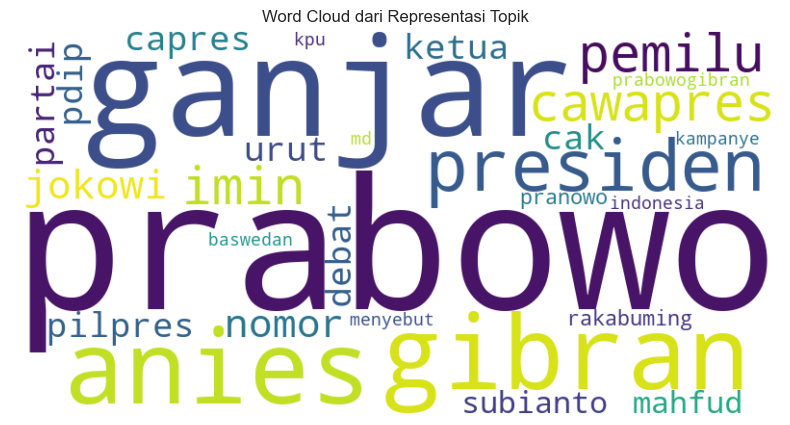

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_representations = ' '.join(top_words.index)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_representations)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Representasi Topik')
plt.show()

In [32]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,cak imin cawapres anies dibahas rapat tim 8 de...,3,3_2024_pemilu_pilpres_kpu,"[2024, pemilu, pilpres, kpu, prabowo, suara, d...",[pemilu 2024 dilaksanakan februari 2024 simak ...,2024 - pemilu - pilpres - kpu - prabowo - suar...,False
1,mantan anggota tim 8 kpp iftitah sulaiman part...,2,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...,presiden - politik - jokowi - survei - demokra...,False
2,ppp merespons sby menyebut menteri aktif menga...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False
3,zulhas menyebut cak imin seakanakan belok lamp...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False
4,gerindra bicara peluang demokrat merapat koali...,2,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...,presiden - politik - jokowi - survei - demokra...,False
...,...,...,...,...,...,...,...
15014,cak imin menyoroti proses pencoblosan negeri c...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False
15015,pelanggaran formulir c6 pemberitahuan pemungut...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False
15016,samawi menggelar doa kelancaran pemilu 2024 sa...,3,3_2024_pemilu_pilpres_kpu,"[2024, pemilu, pilpres, kpu, prabowo, suara, d...",[pemilu 2024 dilaksanakan februari 2024 simak ...,2024 - pemilu - pilpres - kpu - prabowo - suar...,False
15017,kpu ri menerbitkan keputusan pencoblosan pania...,3,3_2024_pemilu_pilpres_kpu,"[2024, pemilu, pilpres, kpu, prabowo, suara, d...",[pemilu 2024 dilaksanakan februari 2024 simak ...,2024 - pemilu - pilpres - kpu - prabowo - suar...,False


In [33]:
# Mengambil hasil dari pemodelan topic_model.get_document_info(docs)
document_info = topic_model.get_document_info(docs)

# Mengonversi ke DataFrame Pandas
df_document_info = pd.DataFrame(document_info)

# 3. Menambahkan kolom date dan link dari dataset mentah ke df_document_info
df_document_info['date'] = df_subset['date']  # ganti 'date' dengan nama kolom tanggal di dataset mentah
df_document_info['link'] = df_subset['link']  # ganti 'link' dengan nama kolom link di dataset mentah

# 4. Menyimpan ke file CSV
df_document_info.to_csv('document_info.csv', index=False)

# Menampilkan 10 baris pertama dari df_document_info
df_document_info[:10]

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document,date,link
0,cak imin cawapres anies dibahas rapat tim 8 de...,3,3_2024_pemilu_pilpres_kpu,"[2024, pemilu, pilpres, kpu, prabowo, suara, d...",[pemilu 2024 dilaksanakan februari 2024 simak ...,2024 - pemilu - pilpres - kpu - prabowo - suar...,False,01/09/2023,https://news.detik.com/pemilu/d-6908814/eks-ti...
1,mantan anggota tim 8 kpp iftitah sulaiman part...,2,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...,presiden - politik - jokowi - survei - demokra...,False,01/09/2023,https://news.detik.com/pemilu/d-6908786/eks-an...
2,ppp merespons sby menyebut menteri aktif menga...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False,01/09/2023,https://news.detik.com/pemilu/d-6908769/ppp-so...
3,zulhas menyebut cak imin seakanakan belok lamp...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False,01/09/2023,https://news.detik.com/pemilu/d-6908759/cak-im...
4,gerindra bicara peluang demokrat merapat koali...,2,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...,presiden - politik - jokowi - survei - demokra...,False,01/09/2023,https://news.detik.com/pemilu/d-6908749/kata-g...
5,menurutnya kehadiran anies acara wujud kolabor...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False,01/09/2023,https://news.detik.com/pemilu/d-6908743/demokr...
6,eks anggota tim 8 mengungkap pkb partai golkar...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False,01/09/2023,https://news.detik.com/pemilu/d-6908698/eks-ti...
7,demokrat mengambil sikap menyikapi duet anies ...,2,2_presiden_politik_jokowi_survei,"[presiden, politik, jokowi, survei, demokrat, ...",[lembaga survei indikator politik indonesia me...,presiden - politik - jokowi - survei - demokra...,False,01/09/2023,https://news.detik.com/pemilu/d-6908691/pernya...
8,sekjen pkb akronim duet aniescak imin amin dih...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False,01/09/2023,https://news.detik.com/pemilu/d-6908671/pkb-si...
9,pkb deklarasi aniescak imin besok siang suraba...,0,0_ganjar_prabowo_anies_imin,"[ganjar, prabowo, anies, imin, ketua, cak, gib...",[ketum nasdem surya paloh anies baswedan ketum...,ganjar - prabowo - anies - imin - ketua - cak ...,False,01/09/2023,https://news.detik.com/pemilu/d-6908629/pkb-pa...


# Trend Pemberitaan

In [34]:
import plotly.express as px

# Memuat dataset yang telah diproses
df_document_info = pd.read_csv('document_info.csv')

# Mengonversi kolom 'date' ke dalam format datetime dengan format 'DD/MM/YYYY'
df_document_info['date'] = pd.to_datetime(df_document_info['date'], format='%d/%m/%Y')

# Menghitung jumlah dokumen atau topik untuk setiap tanggal
date_counts = df_document_info['date'].value_counts().sort_index().reset_index()
date_counts.columns = ['date', 'count']  # Mengubah nama kolom untuk mempersiapkan data untuk Plotly

# Membuat plot interaktif menggunakan Plotly Express
fig = px.line(date_counts, x='date', y='count', title='Trend Pemberitaan Berdasarkan Tanggal')
fig.update_xaxes(title='Tanggal')
fig.update_yaxes(title='Jumlah Dokumen')
fig.update_layout(
    xaxis=dict(tickformat="%d-%m-%Y", tickangle=45),
    hovermode='x'  # Mode interaktif ketika mengarahkan kursor
)
# Menyimpan plot interaktif sebagai file HTML
if not os.path.exists('hasil'):
    os.makedirs('hasil')

fig.write_html('trend_pemberitaan.html')

fig.show()

In [35]:
# Menghitung jumlah dokumen atau topik untuk setiap tanggal dan nama topik ('Name')
topic_counts = df_document_info.groupby(['Name', 'date']).size().reset_index(name='count')

# Memilih lima topik teratas berdasarkan jumlah dokumen
top_5_topics = topic_counts.groupby('Name')['count'].sum().nlargest(5).index

# Membuat plot interaktif untuk masing-masing dari lima topik
fig = px.line(topic_counts[topic_counts['Name'].isin(top_5_topics)], 
              x='date', 
              y='count', 
              color='Name', 
              title='Trend Pemberitaan Berdasarkan Tanggal untuk 5 Topik Utama')
fig.update_xaxes(title='Tanggal', tickformat="%d-%m-%Y", tickangle=45)
fig.update_yaxes(title='Jumlah Dokumen')
fig.update_layout(hovermode='x')  # Mode interaktif ketika mengarahkan kursor
fig.write_html('trend_topik.html')
fig.show()

In [38]:
# Menghasilkan visualisasi dari model topik
topics_fig = topic_model.visualize_topics()
hierarchy_fig = topic_model.visualize_hierarchy()
barchart_fig = topic_model.visualize_barchart()
heatmap_fig = topic_model.visualize_heatmap()
term_rank_fig = topic_model.visualize_term_rank()

# Menyimpan visualisasi dalam format HTML
if not os.path.exists('hasil'):
    os.makedirs('hasil')

topics_fig.write_html('hasil/visualize_topics.html')
hierarchy_fig.write_html('hasil/visualize_hierarchy.html')
barchart_fig.write_html('hasil/visualize_barchart.html')
heatmap_fig.write_html('hasil/visualize_heatmap.html')
term_rank_fig.write_html('hasil/visualize_term_rank.html')

print("Gambar interaktif berhasil disimpan dalam folder 'hasil'")

Gambar interaktif berhasil disimpan dalam folder 'hasil'
